<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Wine Quality</font></h1>
<h2 align="center"><font size="5">Deadline: 2019-08-25 23:59:59</font></h2>
<h3 align="center"><font size="5"> Total marks: 3.0</font></h3>

### Your information:
- Fullname: LÊ VĂN ĐIỆP
- Date of birth: 04/04/1990
- Place of birth: An Giang
- Email: levandiep44@gmail.com
- Mobile phone: 0989754363

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Algorithm** to predict: "wine quality" by accuracy evaluation methods.

Please read [Wine Quality information](https://archive.ics.uci.edu/ml/datasets/wine+quality) carefully before you do this project! 

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Regression
    - Linear Regression
    - Model Evaluation using Test set
    - Report

In [163]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, log_loss
from scipy.stats import skew
from scipy.stats import boxcox
from scipy.stats import pearsonr
%matplotlib inline
from matplotlib import rcParams
from imblearn.over_sampling import SMOTE
rcParams['figure.figsize'] = (15, 7)

In [2]:
# Read CSV file: loan_train.csv
# code here
df_train_red = pd.read_csv("winequality-red.csv", sep=';')
df_train_red.shape

#pd.read_csv??

(1599, 12)

In [3]:
df_train_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_train_red.shape

(1599, 12)

In [5]:
df_train_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# code here
df_train_white = pd.read_csv("winequality-white.csv", sep=';')
df_train_white.shape

(4898, 12)

In [7]:
df_train_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
df_train_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
# Không có giá trị null

In [10]:
df_train_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# 1. Indentify Variables

1. Input: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol',
2. Output: 'quality'


3. Type of variable:

    3.1 Predictor: khác quality
    
    3.2 Target: quality
    
4.Data Type:

    4.2 Numberic: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'
    
5. Variable Category

 - quality

# Làm với bài rượu vang đỏ

In [11]:
numbers = [f for f in df_train_red.columns if df_train_red.dtypes[f] != 'object']
numbers

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [12]:
#Categorical
i = 1
for obj in numbers:
    print(i, "/", obj, "\t", len(df_train_red[obj].unique()), ":", df_train_red[obj].unique() if len(df_train_red[obj].unique()) < 10 else "")
    i = i + 1

1 / fixed acidity 	 96 : 
2 / volatile acidity 	 143 : 
3 / citric acid 	 80 : 
4 / residual sugar 	 91 : 
5 / chlorides 	 153 : 
6 / free sulfur dioxide 	 60 : 
7 / total sulfur dioxide 	 144 : 
8 / density 	 436 : 
9 / pH 	 89 : 
10 / sulphates 	 96 : 
11 / alcohol 	 65 : 
12 / quality 	 6 : [5 6 7 4 8 3]


# Làm với bài rượu vang trắng


In [13]:
#Categorical and continues
i = 1
for obj in numbers:
    print(i, "/", obj, "\t", len(df_train_white[obj].unique()), ":", df_train_white[obj].unique() if len(df_train_white[obj].unique()) < 10 else "")
    i = i + 1

1 / fixed acidity 	 68 : 
2 / volatile acidity 	 125 : 
3 / citric acid 	 87 : 
4 / residual sugar 	 310 : 
5 / chlorides 	 160 : 
6 / free sulfur dioxide 	 132 : 
7 / total sulfur dioxide 	 251 : 
8 / density 	 890 : 
9 / pH 	 103 : 
10 / sulphates 	 79 : 
11 / alcohol 	 103 : 
12 / quality 	 7 : [6 5 7 8 4 3 9]


In [14]:
df_train_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
df_train_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# merge 2 rượu vang đỏ và rượu vang trắng


In [16]:
df = pd.merge(df_train_red,df_train_white)
df.shape

(3, 12)

In [17]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
1,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
2,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5


In [18]:
df2 = pd.concat([df_train_red, df_train_white])
df2.shape

(6497, 12)

In [19]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Continuous variable

In [20]:
#alcohol
df2['alcohol'].describe(include='all')

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [21]:
alcohol_median = df2.alcohol.median()
alcohol_median

10.3

In [22]:
alcohol_mode = df2.alcohol.mode()
alcohol_mode

0    9.5
dtype: float64

In [23]:
#measure of dispersion
alcohol_range = df2.alcohol.ptp()
alcohol_range

c:\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  


6.9

In [24]:
Q1_alcohol = np.percentile(df2.alcohol, 25)
Q1_alcohol

9.5

In [25]:
Q3_alcohol = np.percentile(df2.alcohol,75)
Q3_alcohol

11.3

In [26]:
Alcohol_iqr = scipy.stats.iqr(df2.alcohol)
Alcohol_iqr

1.8000000000000007

In [27]:
Alcohol_var = df2.alcohol.var()
Alcohol_var

1.4225613158949029

In [28]:
Alcohol_std = df2.alcohol.std()
Alcohol_std

1.192711748870993

In [29]:
Alcohol_skew = df2.alcohol.skew()
Alcohol_skew

0.565717729098518

In [30]:
# phân phối hơi lệch về phía bên phải

In [31]:
import seaborn as sns

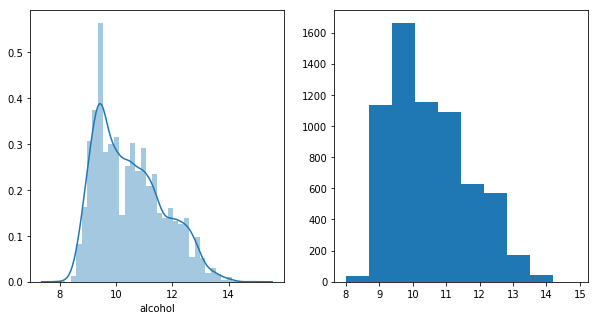

In [166]:
# visualization # histogram
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df2.alcohol)
plt.subplot(1,2,2)
plt.hist(df2.alcohol)
plt.show()

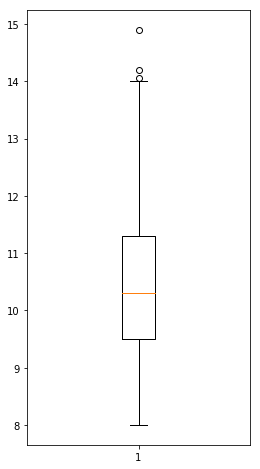

In [33]:
#boxplot
plt.figure(figsize=(4,8))
plt.boxplot(df2.alcohol)
plt.show()

In [34]:
# Có vài outlier phía trên Q3 chất lượng với độ cồn mạnh

In [35]:
#number of upper outliers
alcohol_upper = df2[df2.alcohol > (Q3_alcohol + 1.5* Alcohol_iqr)].shape[0]
alcohol_upper

3

In [36]:
#number of lower outliers
alcohol_lower = df2[df2.alcohol < (Q1_alcohol + 1.5*Alcohol_iqr)].shape[0]
alcohol_lower

5811

In [37]:
# Tương tự cho các tính năng khác

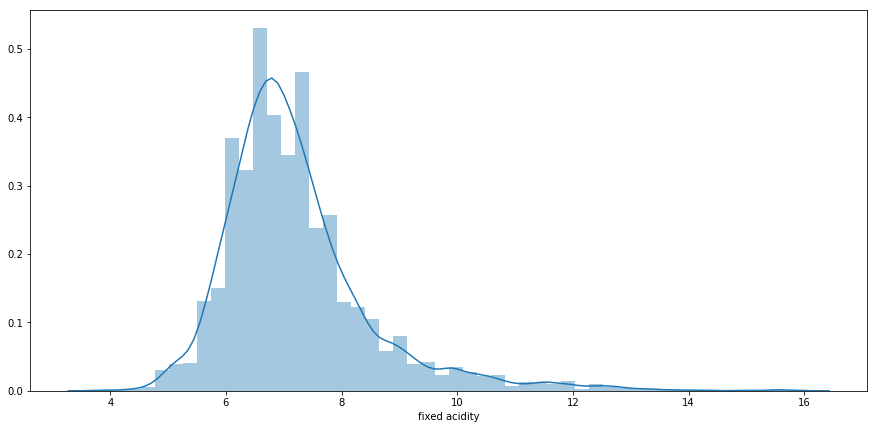

In [164]:
#fixed acidity
sns.distplot(df2['fixed acidity'])
plt.show()

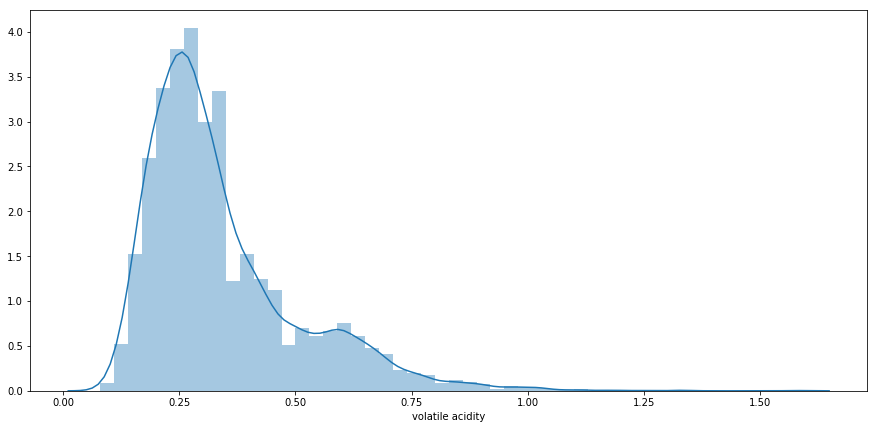

In [165]:
#volatile acidit
sns.distplot(df2['volatile acidity'])
plt.show()

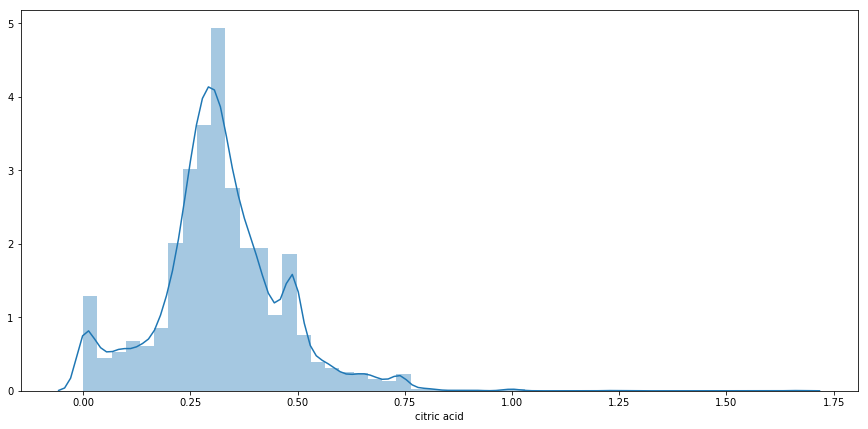

In [167]:
#citric acid
sns.distplot(df2['citric acid'])
plt.show()

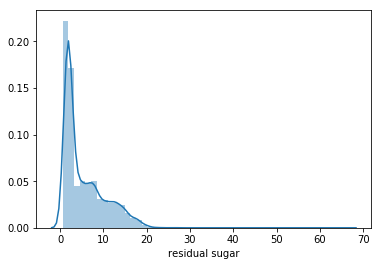

In [157]:
#residual sugar
sns.distplot(df2['residual sugar'])
plt.show()

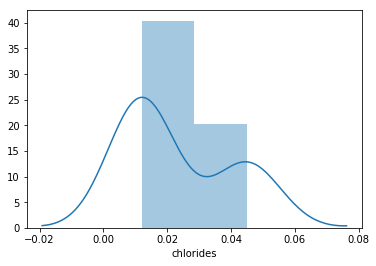

In [154]:
#chlorides
sns.distplot(df2['chlorides'])
plt.show()

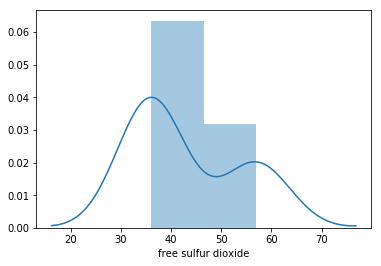

In [155]:
#free sulfur dioxide
sns.distplot(df2['free sulfur dioxide'])
plt.show()

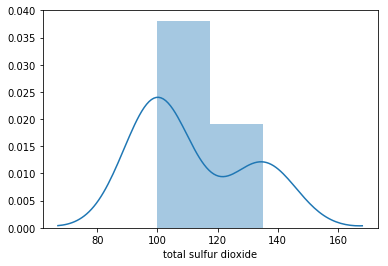

In [156]:
#total sulfur dioxide
sns.distplot(df2['total sulfur dioxide'])
plt.show()

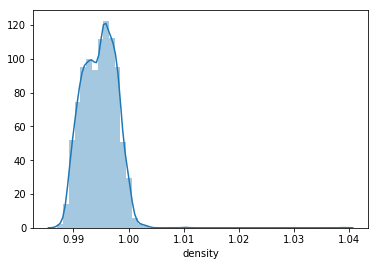

In [158]:
#density
sns.distplot(df2['density'])
plt.show()

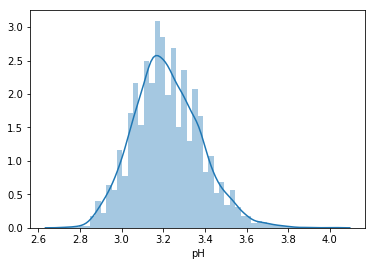

In [160]:
#pH
sns.distplot(df2['pH'])
plt.show()

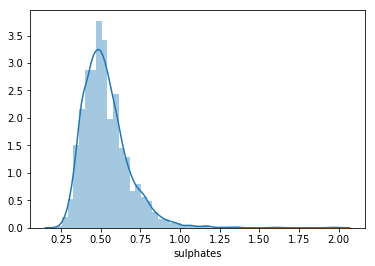

In [162]:
#sulphates
sns.distplot(df2['sulphates'])
plt.show()

# 3.Phan tich hai bien
continuous and continuous

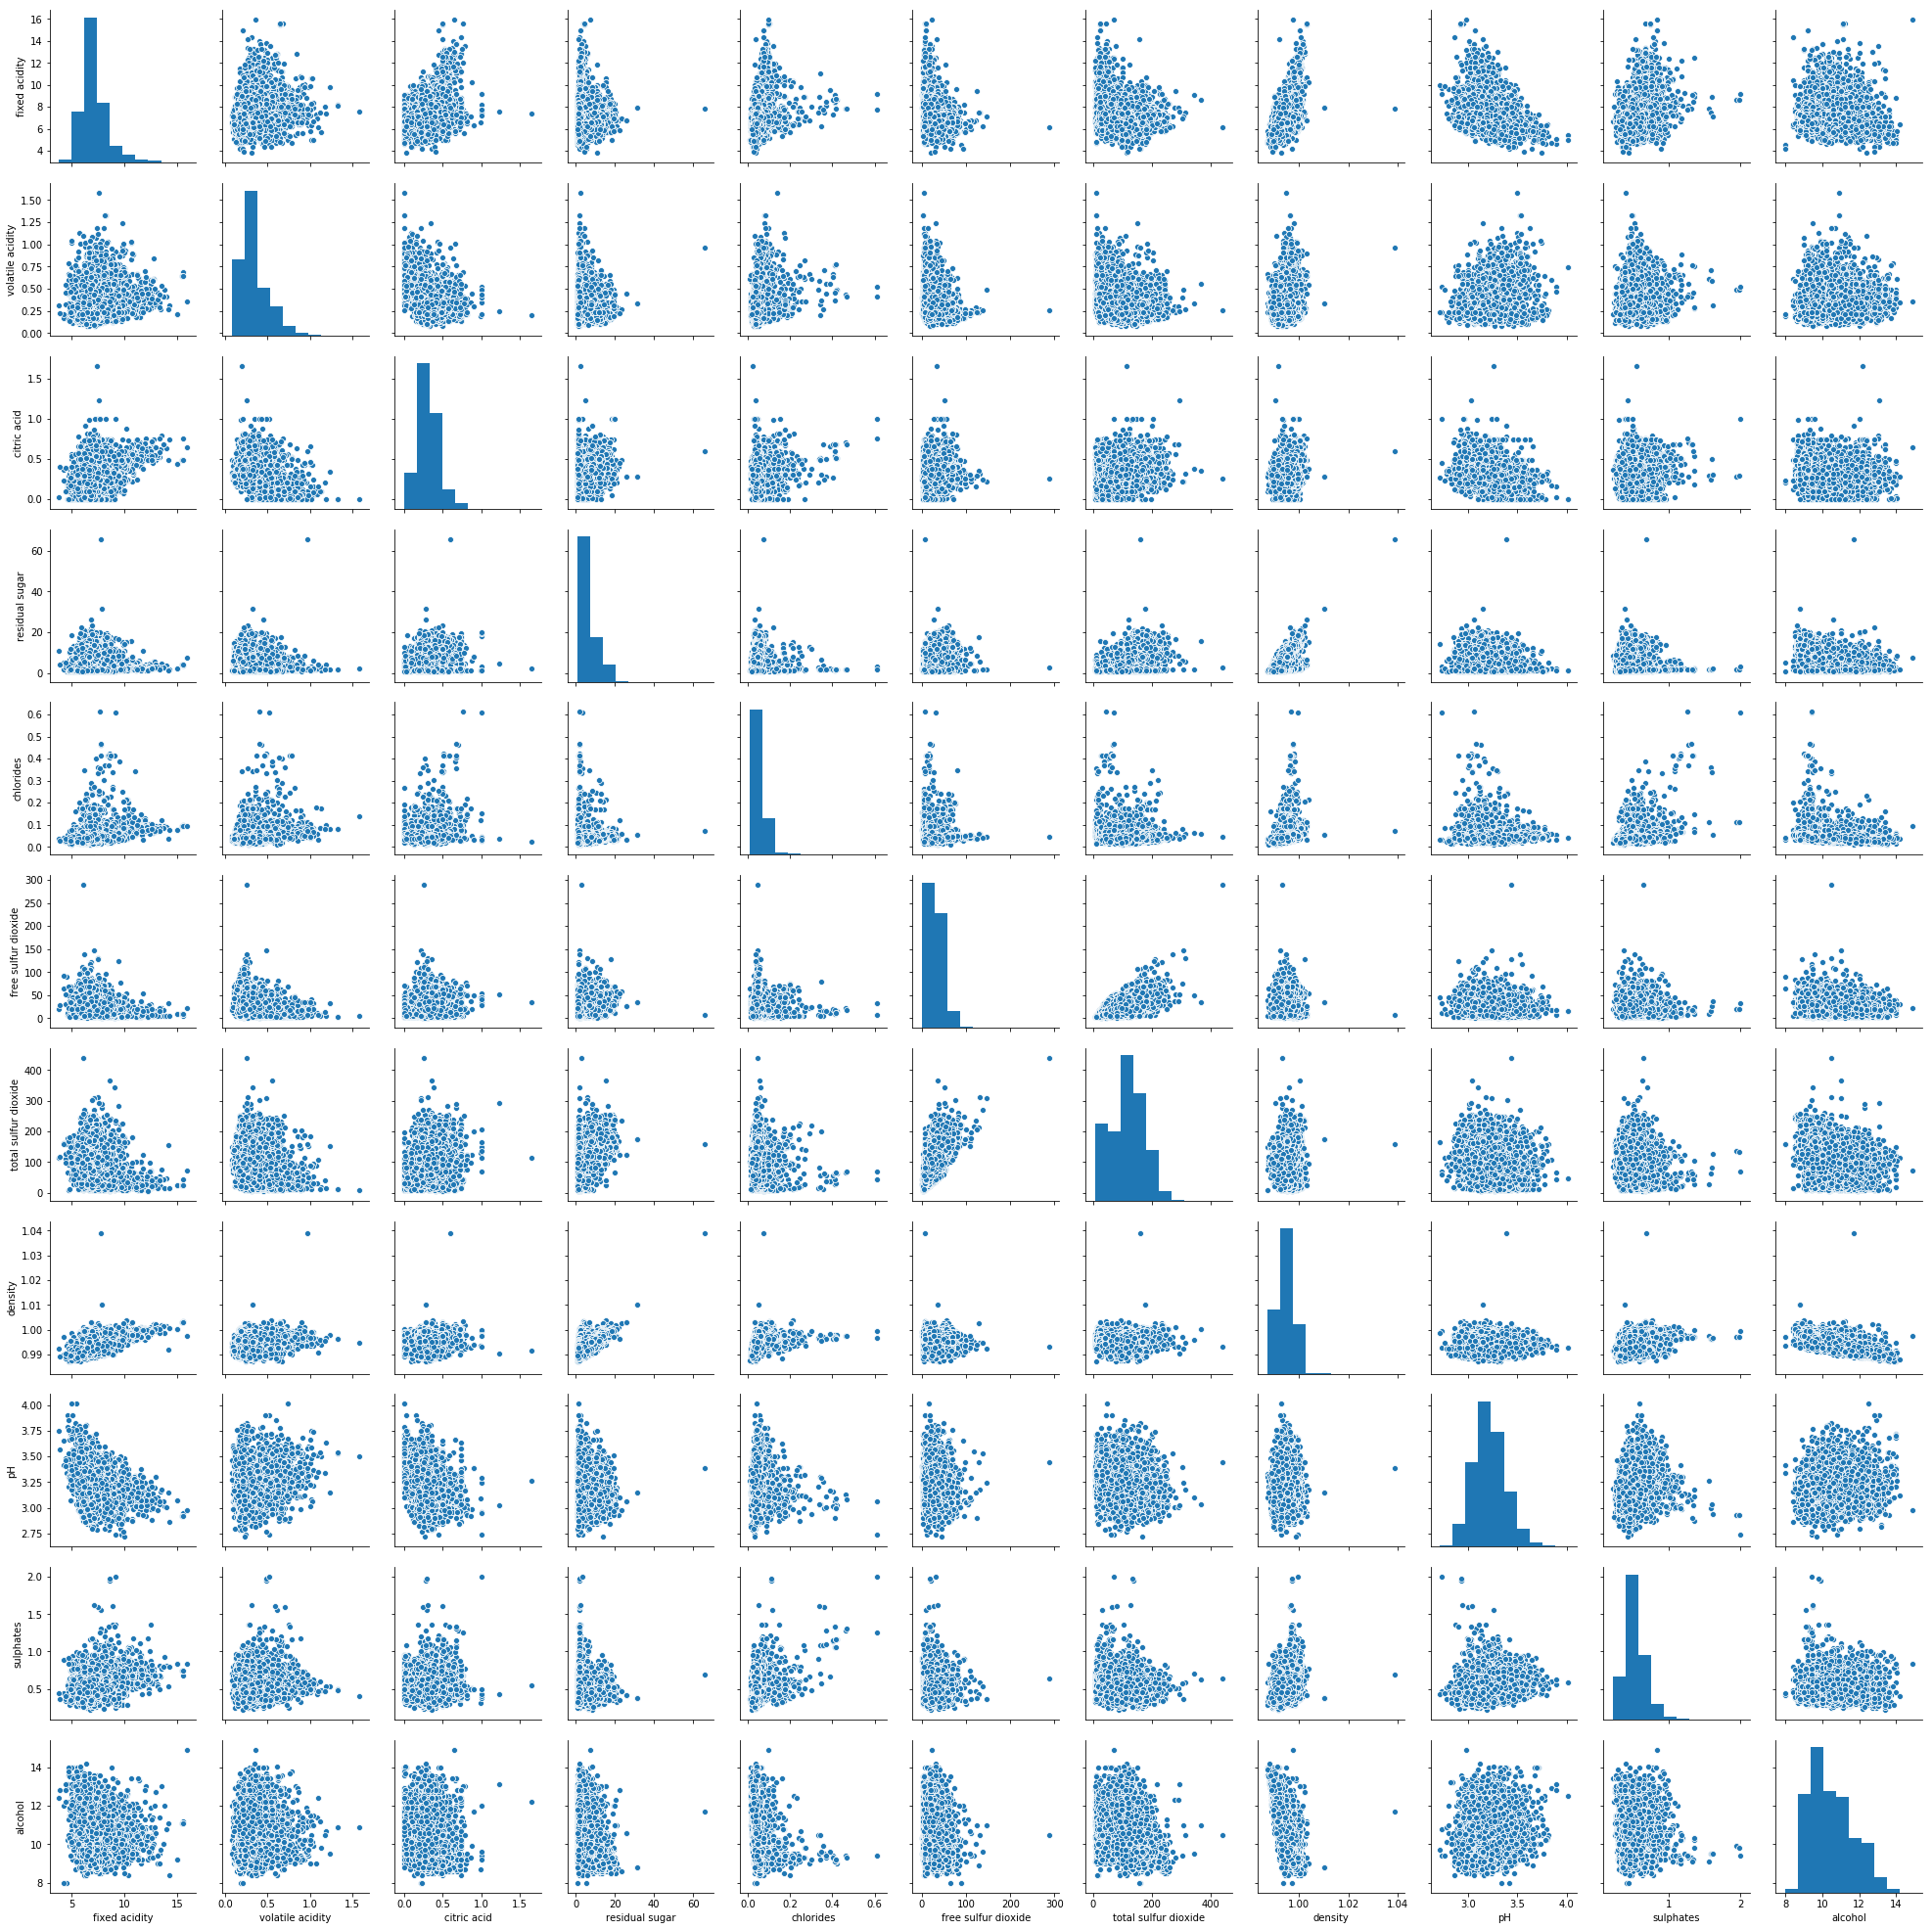

In [168]:
# tổng quan
sns.pairplot(df2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
   'pH', 'sulphates', 'alcohol']])
plt.show()

In [169]:
# Mối tương quan giữa các biến

correlation = df2.corr()

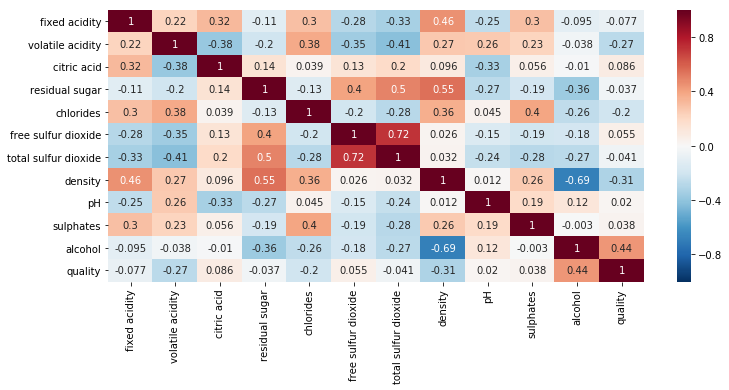

In [170]:
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [41]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

### Nhận xét: alcohol, sulphates, citric acid, free sulfur dioxide, pH' có mối tương quan mạnh với 'quality'.

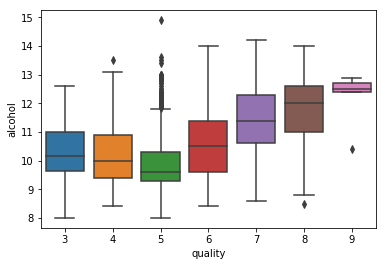

In [42]:
#alcohol with quanlity
sns.boxplot('quality', 'alcohol', data = df2)
plt.show()

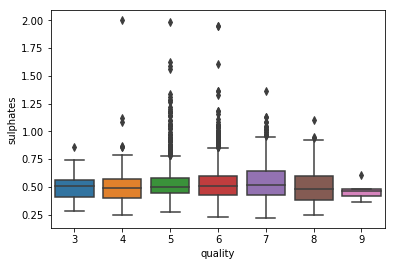

In [43]:
#sulphates with quanlity
sns.boxplot('quality', 'sulphates', data = df2)
plt.show()

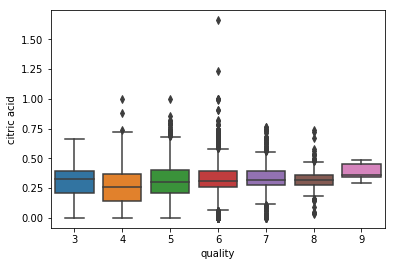

In [44]:
#citric_acid with quanlity
sns.boxplot('quality','citric acid', data = df2)
plt.show()

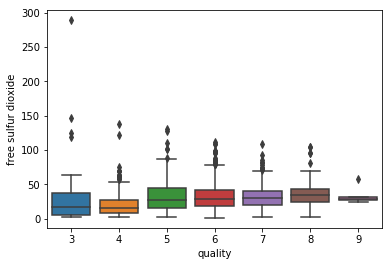

In [45]:
#free sulfur dioxide with quanlity
sns.boxplot('quality','free sulfur dioxide', data = df2)
plt.show()

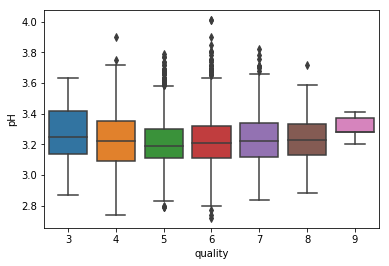

In [46]:
# pH with quanlity
sns.boxplot('quality','pH', data = df2)
plt.show()

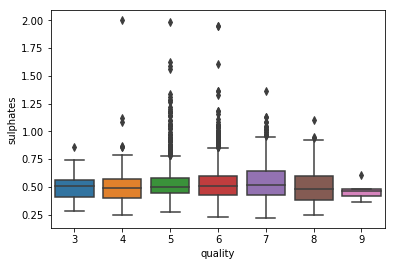

In [47]:
import seaborn as sns
sns.boxplot('quality', 'sulphates', data = df2)
plt.show()

c:\python36\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


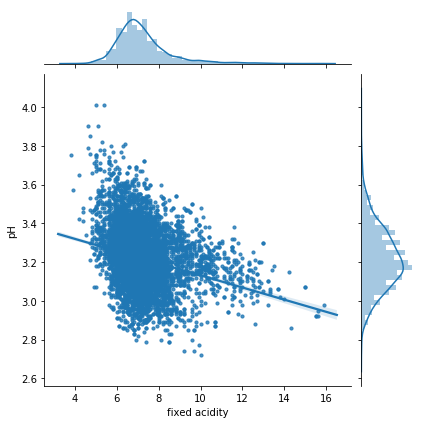

In [106]:
# pH with fixed acidity
g = sns.JointGrid(x="fixed acidity", y="pH", data=df2[['fixed acidity', 'pH']], size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)
plt.show()


c:\python36\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


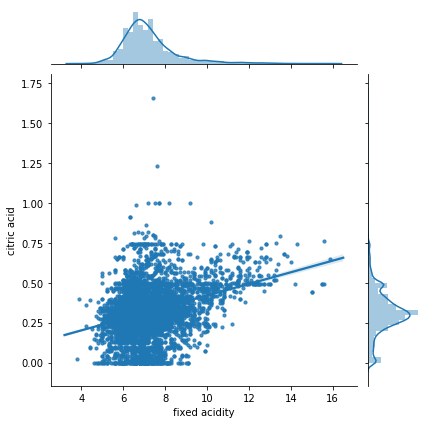

In [107]:
# fixed acidity with citric acid
g = sns.JointGrid(x="fixed acidity", y="citric acid", data=df2[['fixed acidity', 'citric acid']], size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)
plt.show()

# Outlier

In [109]:
for feature in df2.keys():
    # Q1 
    Q1 = np.percentile(df2[feature], q=25)

    # Q3
    Q3 = np.percentile(df2[feature], q=75)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range

    # Display the outliers
    print("Tính năng có outlier '{}':".format(feature))
    display(df2[~((df2[feature] >= Q1 - step) & (df2[feature] <= Q3 + step))])


#outliers = []
# Xóa outlier
#df3 = df2.drop(df2.index[outliers]).reset_index(drop = True)

Tính năng có outlier 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,average
56,10.2,0.420,0.57,3.40,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5,average
74,9.7,0.320,0.54,2.50,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,5,average
113,10.1,0.310,0.44,2.30,0.080,22.0,46.0,0.99880,3.32,0.67,9.7,6,average
197,11.5,0.300,0.60,2.00,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,6,average
205,12.8,0.300,0.74,2.60,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7,good
206,12.8,0.300,0.74,2.60,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7,good
209,11.0,0.300,0.58,2.10,0.054,7.0,19.0,0.99800,3.31,0.88,10.5,7,good
210,9.7,0.530,0.60,2.00,0.039,5.0,19.0,0.99585,3.30,0.86,12.4,6,average
212,11.6,0.440,0.64,2.10,0.059,5.0,15.0,0.99800,3.21,0.67,10.2,6,average


Tính năng có outlier 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,average
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,average
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,average
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,average
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,average
28,7.1,0.710,0.00,1.90,0.080,14.0,35.0,0.99720,3.47,0.55,9.4,5,average
30,6.7,0.675,0.07,2.40,0.089,17.0,82.0,0.99580,3.35,0.54,10.1,5,average
31,6.9,0.685,0.00,2.50,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6,average
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4,bad
43,8.1,0.660,0.22,2.20,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5,average


Tính năng có outlier 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.80,5,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.40,5,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7,good
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.90,5,average
28,7.1,0.710,0.00,1.9,0.080,14.0,35.0,0.99720,3.47,0.55,9.40,5,average
29,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.80,6,average
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.60,6,average


Tính năng có outlier 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6,average
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6,average
14,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5,average
38,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5,average
39,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5,average
103,7.5,0.305,0.40,18.90,0.059,44.0,170.0,1.00000,2.99,0.46,9.00,5,average
111,7.2,0.270,0.46,18.75,0.052,45.0,255.0,1.00000,3.04,0.52,8.90,5,average
174,7.5,0.270,0.31,17.70,0.051,33.0,173.0,0.99900,3.09,0.64,10.20,5,average
182,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.70,5,average
191,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.70,5,average


Tính năng có outlier 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
13,7.8,0.610,0.29,1.60,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5,average
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5,average
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5,average
17,8.1,0.560,0.28,1.70,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5,average
19,7.9,0.320,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,average
22,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,average
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,average
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4,bad
42,7.5,0.490,0.20,2.60,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6,average
46,7.7,0.935,0.43,2.20,0.114,22.0,114.0,0.99700,3.25,0.73,9.2,5,average


Tính năng có outlier 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
67,6.7,0.250,0.13,1.20,0.041,81.0,174.0,0.99200,3.14,0.42,9.8,5,average
297,7.2,0.190,0.46,3.80,0.041,82.0,187.0,0.99320,3.19,0.60,11.2,7,good
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5,average
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5,average
395,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5,average
405,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5,average
459,6.1,0.430,0.35,9.10,0.059,83.0,249.0,0.99710,3.37,0.50,8.5,5,average
484,6.2,0.370,0.30,6.60,0.346,79.0,200.0,0.99540,3.29,0.58,9.6,5,average
659,6.8,0.290,0.16,1.40,0.038,122.5,234.5,0.99220,3.15,0.47,10.0,4,bad
731,6.2,0.250,0.48,10.00,0.044,78.0,240.0,0.99655,3.25,0.47,9.5,6,average


Tính năng có outlier 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
1079,7.9,0.30,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7,good
1081,7.9,0.30,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7,good
325,7.5,0.27,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5,average
1417,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,bad
1931,7.1,0.49,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3,bad
2127,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5,average
2378,9.4,0.23,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5,average
2654,6.9,0.40,0.22,5.95,0.081,76.0,303.0,0.99705,3.40,0.57,9.4,5,average
3152,7.6,0.25,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6,average
4745,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,bad


Tính năng có outlier 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
1653,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,average
1663,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,average
2781,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,average


Tính năng có outlier 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,bad
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4,bad
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6,average
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,average
144,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,average
151,9.2,0.520,1.00,3.40,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4,bad
268,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6,average
276,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6,average
297,7.1,0.630,0.06,2.00,0.083,8.0,29.0,0.99855,3.67,0.73,9.6,5,average
298,7.2,0.650,0.02,2.30,0.094,5.0,31.0,0.99930,3.67,0.80,9.7,5,average


Tính năng có outlier 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
13,7.8,0.610,0.29,1.60,0.114,9.0,29.0,0.99740,3.26,1.56,9.100000,5,average
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.200000,5,average
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.200000,5,average
17,8.1,0.560,0.28,1.70,0.368,16.0,56.0,0.99680,3.11,1.28,9.300000,5,average
19,7.9,0.320,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.200000,6,average
22,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,average
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,average
42,7.5,0.490,0.20,2.60,0.332,8.0,14.0,0.99680,3.21,0.90,10.500000,6,average
43,8.1,0.660,0.22,2.20,0.069,9.0,23.0,0.99680,3.30,1.20,10.300000,5,average
69,8.0,0.705,0.05,1.90,0.074,8.0,19.0,0.99620,3.34,0.95,10.500000,6,average


Tính năng có outlier 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.90,5,average
3918,6.4,0.35,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7,good
4503,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7,good


Tính năng có outlier 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
267,7.9,0.350,0.46,3.60,0.078,15.0,37.0,0.99730,3.35,0.86,12.80,8,good
278,10.3,0.320,0.45,6.40,0.073,5.0,13.0,0.99760,3.23,0.82,12.60,8,good
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.90,8,good
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8,good
455,11.3,0.620,0.67,5.20,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,8,good
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3,bad
481,9.4,0.300,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8,good
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8,good
498,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8,good
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3,bad


TypeError: can't multiply sequence by non-int of type 'float'

In [171]:
X = df2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
#X = df2[['alcohol', 'sulphates', 'citric acid', 'free sulfur dioxide', 'pH']]
Y = df2['quality']

In [182]:
from tukey_outliers_helper import TukeyOutliersHelper

In [183]:
bounds = TukeyOutliersHelper().getBoundsFromDataFrame(X, kk=3.0, outlier_columns=X.columns)
bounds

fixed acidity                             (2.500000000000001, 11.6)
volatile acidity                                      (-0.28, 0.91)
citric acid                            (-0.17000000000000004, 0.81)
residual sugar                          (-17.099999999999998, 27.0)
chlorides               (-0.04300000000000002, 0.14600000000000002)
free sulfur dioxide                                  (-55.0, 113.0)
total sulfur dioxide                                (-160.0, 393.0)
density                    (0.9783900000000002, 1.0109399999999997)
pH                                       (2.48, 3.9499999999999997)
sulphates                (-0.08000000000000002, 1.1099999999999999)
alcohol                     (4.099999999999998, 16.700000000000003)
dtype: object

In [184]:
counts = TukeyOutliersHelper.countOutliersDataPoints(X, bounds)
counts

c:\python36\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


fixed acidity            86
volatile acidity         47
citric acid              15
residual sugar            3
chlorides               133
free sulfur dioxide       8
total sulfur dioxide      1
density                   1
pH                        2
sulphates                35
alcohol                   0
dtype: object

In [188]:
fatal_inds_set = TukeyOutliersHelper.getOutlierDataPoints(X, bounds)
fatal_inds_set

{13,
 14,
 15,
 17,
 19,
 38,
 42,
 43,
 46,
 79,
 81,
 83,
 86,
 88,
 91,
 92,
 94,
 106,
 120,
 126,
 127,
 134,
 147,
 151,
 160,
 169,
 181,
 199,
 205,
 206,
 226,
 234,
 239,
 240,
 241,
 243,
 244,
 258,
 261,
 264,
 265,
 281,
 286,
 291,
 294,
 303,
 307,
 308,
 328,
 335,
 338,
 339,
 340,
 344,
 347,
 353,
 358,
 359,
 362,
 363,
 364,
 366,
 368,
 369,
 374,
 376,
 377,
 381,
 391,
 394,
 395,
 402,
 407,
 408,
 409,
 418,
 422,
 424,
 429,
 432,
 433,
 435,
 440,
 441,
 442,
 446,
 449,
 450,
 451,
 470,
 472,
 482,
 483,
 509,
 510,
 515,
 516,
 517,
 531,
 532,
 538,
 544,
 548,
 549,
 553,
 554,
 555,
 557,
 559,
 560,
 564,
 565,
 566,
 567,
 568,
 575,
 580,
 581,
 582,
 583,
 584,
 596,
 597,
 599,
 600,
 601,
 603,
 611,
 614,
 633,
 638,
 639,
 652,
 657,
 664,
 666,
 672,
 680,
 684,
 689,
 690,
 691,
 692,
 699,
 700,
 705,
 710,
 723,
 724,
 730,
 735,
 736,
 754,
 756,
 773,
 774,
 775,
 776,
 777,
 780,
 795,
 808,
 811,
 814,
 833,
 858,
 861,
 882,
 899,
 91

In [191]:
print("lose {0} total instances".format(len(fatal_inds_set) / len(X)))

lose 0.042327227951362165 total instances


In [192]:
keep_inds = list(set(range(len(X))).difference(fatal_inds_set))
assert len(keep_inds) + len(fatal_inds_set) == len(X)

In [193]:
XX_no_outliers = X.iloc[keep_inds]
XX_no_outliers.shape

(6222, 11)

In [194]:
df2.shape

(6497, 13)

In [196]:
yy = df2['quality']
yy.shape

(6497,)

In [197]:
yy_no_outliers = yy.iloc[keep_inds]
yy_no_outliers.shape

(6222,)

# tạo cột phân loại chất lượng rượu


In [48]:
df2['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [49]:
# phân phối
df2.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

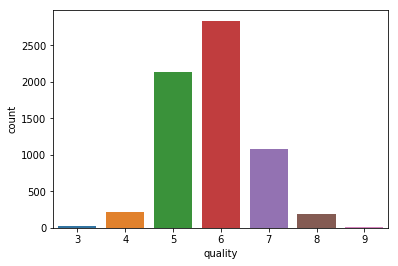

In [50]:
sns.countplot(x='quality', data=df2)

In [51]:
#Tạm chia loại ngon 'good' và loại thường trung bình 'average' và loại tệ 'bad'
conditions = [
    (df2['quality'] >= 7),
    (df2['quality'] <= 4)
]
rating = ['good', 'bad']
df2['rating'] = np.select(conditions, rating, default='average')
df2.rating.value_counts()

average    4974
good       1277
bad         246
Name: rating, dtype: int64

In [52]:
df2.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,7.241536,0.346423,0.316765,5.659087,0.058674,30.766285,117.744069,0.995113,3.215346,0.529908,10.265275,5.570165
bad,7.357724,0.465163,0.273374,4.273984,0.062126,22.902439,105.701220,0.994944,3.234797,0.505732,10.184350,3.878049
good,7.085709,0.289170,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966


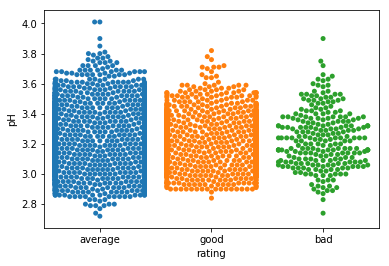

In [53]:
# pH with wine ratings
sns.swarmplot(x="rating", y="pH", data = df2)
plt.show()

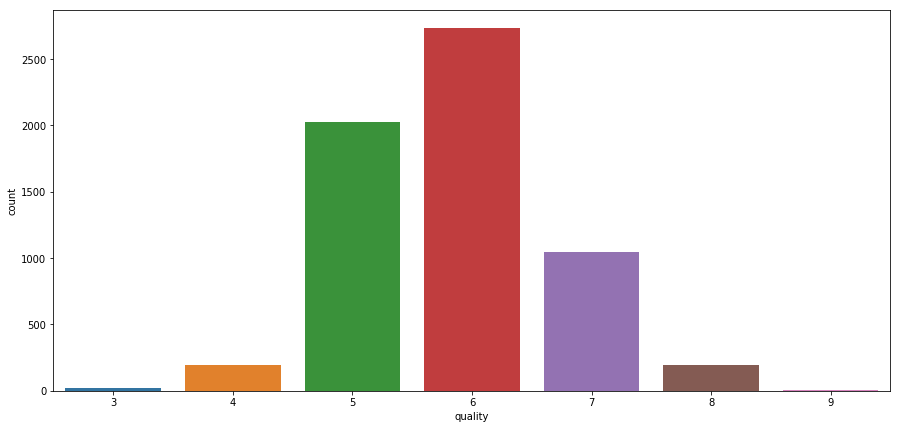

In [198]:
#Phân phối của chất lượng rượu
sns.countplot(yy_no_outliers)
plt.show()

# Cân bằng dữ liệu

In [199]:
from sklearn.model_selection import StratifiedKFold

In [202]:
n_splits = 10  #10 splits
seed = 160184
random_state = np.random.RandomState(seed=seed)

In [203]:
kFold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

In [204]:
data_len = len(XX_no_outliers)
data_len

6222

In [207]:
indices_iterator = kFold.split(np.zeros(data_len), yy_no_outliers)
for train_inds, valid_inds in indices_iterator:
    print(train_inds.shape, valid_inds.shape)

(5596,) (626,)
(5598,) (624,)
(5598,) (624,)
(5601,) (621,)
(5601,) (621,)
(5600,) (622,)
(5600,) (622,)
(5601,) (621,)
(5602,) (620,)
(5601,) (621,)


c:\python36\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [209]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [212]:
sm = SMOTE(random_state=random_state)

In [213]:
ros = RandomOverSampler(random_state=random_state)

(19124, 11) (19124,)


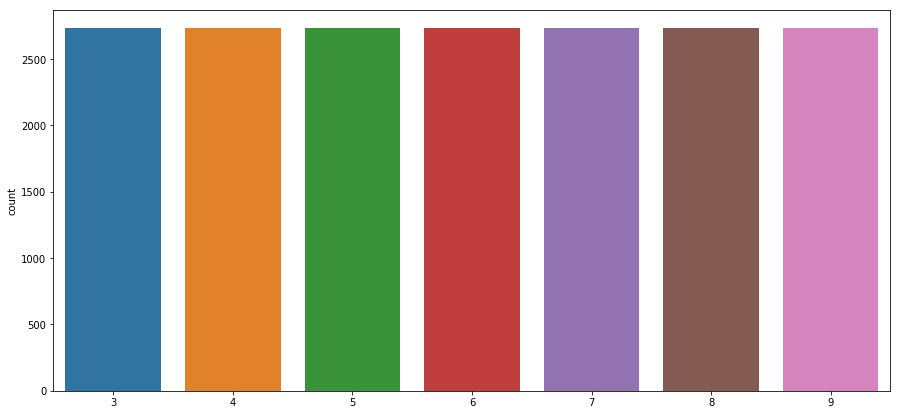

In [214]:
#unit testing
xx_upsampled, yy_upsampled = ros.fit_sample(XX_no_outliers, yy_no_outliers)
print(xx_upsampled.shape, yy_upsampled.shape)
sns.countplot(yy_upsampled)
plt.show()

In [215]:
# Dữ liệu đã tương đối cân bằng

# Linear Regression

In [126]:

X = df2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
#X = df2[['alcohol', 'sulphates', 'citric acid', 'free sulfur dioxide', 'pH']]
Y = df2['quality']

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
clf = LinearRegression()

In [130]:
from sklearn.utils.validation import column_or_1d
clf.fit(X_train, column_or_1d(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
clf.coef_
#tuong ung voi intercept, 

array([ 6.20668706e-02, -1.31789038e+00, -7.07141033e-02,  4.67272634e-02,
       -1.94334760e-01,  6.31187893e-03, -2.75577656e-03, -5.66415853e+01,
        4.47973047e-01,  7.73261680e-01,  2.68810342e-01])

In [132]:
# Train model
clf.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
b = clf.intercept_
b

57.38776271239956

In [134]:
clf.coef_

array([ 6.20668706e-02, -1.31789038e+00, -7.07141033e-02,  4.67272634e-02,
       -1.94334760e-01,  6.31187893e-03, -2.75577656e-03, -5.66415853e+01,
        4.47973047e-01,  7.73261680e-01,  2.68810342e-01])

In [135]:
# Predict trên X_train_u
yHat_train = clf.predict(X_train)
yHat_train

array([4.87984648, 5.64506172, 5.46807006, ..., 6.34883841, 5.44807789,
       6.37755751])

In [136]:
# Predict trên X_test_u
yHat_test = clf.predict(X_test)
yHat_test

array([5.90432376, 5.36072793, 5.54115901, ..., 6.26621632, 5.55928479,
       6.49132299])

In [125]:
y_train[0:5]
yHat_train[0:5]

array([6.46013734, 6.64708742, 5.41555652, 6.45273345, 5.13536257])

In [141]:
#accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
#y_train
accuracy_score(y_train, yHat_train.astype(int))

0.45172641301957334

In [143]:
#y_test
accuracy_score(y_test, yHat_test.astype(int))

0.44666666666666666

In [145]:
#f1-score train
fbeta_score(y_train, yHat_train.astype(int), beta=0.5, average='micro')

0.45172641301957334

In [146]:
#f1-score test
fbeta_score(y_test, yHat_test.astype(int), beta=0.5, average='micro')

0.44666666666666666

In [65]:
# Find the MSE
#from sklearn.metrics import mean_squared_error
#mse1 = mean_squared_error(X, clf.predict(Y))
#print('The mean square error of price and predicted value is: ', mse1)


In [147]:
# Find the R^2
print('The R-square is: ', clf.score(X, Y))

The R-square is:  0.29175354216375293


In [82]:
yHat_l = clf.predict(X)

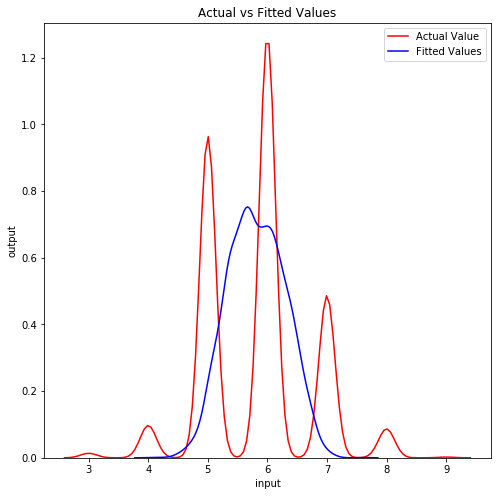

In [148]:
# Đánh giá mô hình
# Distribution plot
plt.figure(figsize=(8,8))
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(yHat_l, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('input')
plt.ylabel('output')

plt.show()
plt.close()

In [94]:
#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test, yHat_l))  
#print(classification_report(y_test, yHat_l))

# Scale

In [98]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)
rescaledX =scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, test_size = 0.2, random_state = 130)

In [99]:
clf2 = LinearRegression()

In [100]:
clf2.fit(X_train, column_or_1d(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
# Train model
clf2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
# Predict trên X_train_u
yHat_train = clf2.predict(X_train)
yHat_train

array([6.46013734, 6.64708742, 5.41555652, ..., 6.21448838, 6.24249183,
       5.59593561])

In [103]:
# Find the R^2
print('The R-square is: ', clf2.score(X, Y))

The R-square is:  -132.9430878715279


In [104]:
yHat_l = clf2.predict(rescaledX)


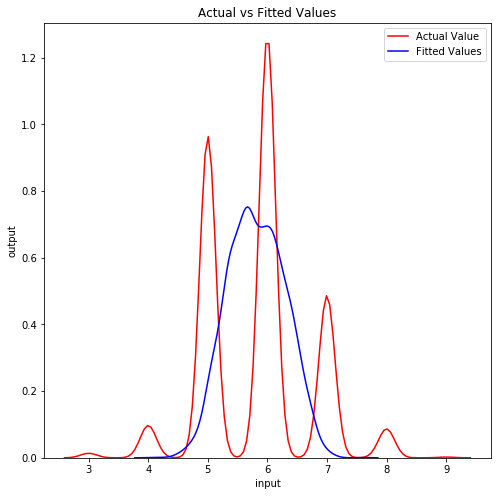

In [105]:
# Đánh giá mô hình
# Distribution plot
plt.figure(figsize=(8,8))
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(yHat_l, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('input')
plt.ylabel('output')

plt.show()
plt.close()

# No outlier